# The basic model with first-order condition

In [1]:
import sys
import os
sys.path.append(os.path.abspath("..")) 
from dynamic_model.Basic import BasicModel
import tensorflow as tf
from dynamic_model.Networks import BellmanNet_FOC
from dynamic_model.Trainer import BellmanTrainer

2026-01-03 11:06:55.504949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-03 11:06:56.775481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = BasicModel(   cost_type = "None")
net = BellmanNet_FOC(model)

Trainer =  BellmanTrainer(model, net, hidden_dim=[32,  32], nu = 10, lr=1e-4)

Trainer.fit(training_steps = 10000, display_step=2000, eval= True,  early_stop = False,  eval_interval=10, n_eval_points = 8192, reward_drop_tolerance = 20)

2026-01-03 11:07:01.180630: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14633 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:61:00.0, compute capability: 7.0
2026-01-03 11:07:01.181458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14633 MB memory:  -> device: 1, name: Tesla V100-SXM2-16GB, pci bus id: 0000:62:00.0, compute capability: 7.0
2026-01-03 11:07:01.182115: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 14634 MB memory:  -> device: 2, name: Tesla V100-SXM2-16GB, pci bus id: 0000:89:00.0, compute capability: 7.0
2026-01-03 11:07:01.182787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 14634 MB memory:  -> device: 3, name: Tesla V100-SXM2-16GB, pci bus id

Starting training ...


Network weights initialized.


2026-01-03 11:07:04.404133: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xd6300050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-03 11:07:04.404157: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2026-01-03 11:07:04.404164: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla V100-SXM2-16GB, Compute Capability 7.0
2026-01-03 11:07:04.404169: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): Tesla V100-SXM2-16GB, Compute Capability 7.0
2026-01-03 11:07:04.404173: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): Tesla V100-SXM2-16GB, Compute Capability 7.0
2026-01-03 11:07:04.411254: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-03 11:07:0

Epoch     1 | loss_total=1.454553e+05 | loss_V=1.454455e+05 | loss_FOC=9.828357e-01
 Eval @ epoch 1: lifetime reward = 4.097e+02


Training progress:  20%|█████████████▉                                                        | 1999/10000 [00:44<02:23]

Epoch  2000 | loss_total=2.856671e+02 | loss_V=2.847928e+02 | loss_FOC=8.752128e-02
 Eval @ epoch 2000: lifetime reward = 4.995e+02


Training progress:  40%|███████████████████████████▉                                          | 3996/10000 [01:24<01:58]

Epoch  4000 | loss_total=1.852370e+02 | loss_V=1.848734e+02 | loss_FOC=3.651698e-02
 Eval @ epoch 4000: lifetime reward = 5.419e+02


Training progress:  60%|█████████████████████████████████████████▉                            | 5999/10000 [02:04<01:12]

Epoch  6000 | loss_total=2.264334e+02 | loss_V=2.263655e+02 | loss_FOC=6.789589e-03
 Eval @ epoch 6000: lifetime reward = 6.616e+02


Training progress:  80%|███████████████████████████████████████████████████████▉              | 7991/10000 [02:44<00:42]

Epoch  8000 | loss_total=2.437919e+02 | loss_V=2.437867e+02 | loss_FOC=5.182905e-04
 Eval @ epoch 8000: lifetime reward = -9.180e+04


Training progress: 100%|█████████████████████████████████████████████████████████████████████▉| 9996/10000 [03:24<00:00]

Epoch 10000 | loss_total=2.080912e+02 | loss_V=2.079078e+02 | loss_FOC=1.953250e-02
 Eval @ epoch 10000: lifetime reward = -8.438e+13


Training progress: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [03:24<00:00]

Training completed.


Best reward: 8.406e+02 @ epoch 6800


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_curves(logs):

    required_keys = ['loss_total_list', 'loss_V_list', 'loss_FOC_list']
   
   
    best_epoch = logs.get('best_epoch', None)
    overfit_epoch = logs.get('overfit_epoch', None)

    keys = ['loss_total_list', 'loss_V_list', 'loss_FOC_list']
    titles = ['Total Loss', 'Bellman Residual', 'FOC Residual']
    colors = ['tab:blue', 'tab:orange', 'tab:green']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for ax, key, title, color in zip(axes, keys, titles, colors):
        values = np.asarray(logs[key])
        steps = np.arange(1, len(values) + 1)

        ymin, ymax = np.min(values), np.max(values)
        pad = 0.05 * (ymax - ymin + 1e-8)
        ax.set_ylim(ymin - pad, ymax + pad)

       
        if best_epoch and best_epoch < len(values):
            ax.plot(steps[:best_epoch], values[:best_epoch], color=color, lw=2, label='Training Loss')
            ax.plot(steps[best_epoch-1:], values[best_epoch-1:], color=color, lw=2, linestyle='--', alpha=0.7)
            ax.axvline(best_epoch, color=color, linestyle=':', lw=1.8, label=f'Best Epoch')
            ax.text(best_epoch, ymin + (ymax - ymin) * 0.9, f"Best", color='red',
                    fontsize=10, ha='center', va='top', fontweight='bold')
        else:
            ax.plot(steps, values, color=color, lw=2, label='Training Loss')

    
       
        ax.set_title(title, fontsize=13, weight="bold")
        ax.set_xlim(0, len(values))
        ax.set_xlabel("Training Steps", fontsize=11)
        ax.set_ylabel("Loss Value", fontsize=11)
        ax.grid(alpha=0.3)
        ax.legend(fontsize=8, loc='best')

    plt.tight_layout()
    plt.show()

In [ ]:
Trainer.__dict__['eval_lifetime_reward']

[409.67462158203125,
 412.23626708984375,
 414.7939453125,
 417.2281494140625,
 419.64886474609375,
 422.2349853515625,
 424.9862976074219,
 427.7325439453125,
 430.9715881347656,
 434.3528747558594,
 438.2530822753906,
 442.719970703125,
 448.0683288574219,
 453.77557373046875,
 458.9561462402344,
 456.2619323730469,
 456.66436767578125,
 456.126708984375,
 455.9962158203125,
 456.01251220703125,
 457.0487365722656,
 462.23822021484375,
 465.08404541015625,
 464.2272033691406,
 465.51092529296875,
 466.67364501953125,
 467.63092041015625,
 467.26531982421875,
 466.86138916015625,
 470.205322265625,
 468.0827331542969,
 470.5450439453125,
 469.08154296875,
 469.28973388671875,
 474.320068359375,
 471.49041748046875,
 472.17999267578125,
 472.6138000488281,
 473.0859375,
 472.34765625,
 471.78045654296875,
 472.7109069824219,
 474.0517578125,
 474.085205078125,
 474.1900939941406,
 475.593017578125,
 473.6617431640625,
 475.3067626953125,
 474.14324951171875,
 475.21026611328125,
 474.1

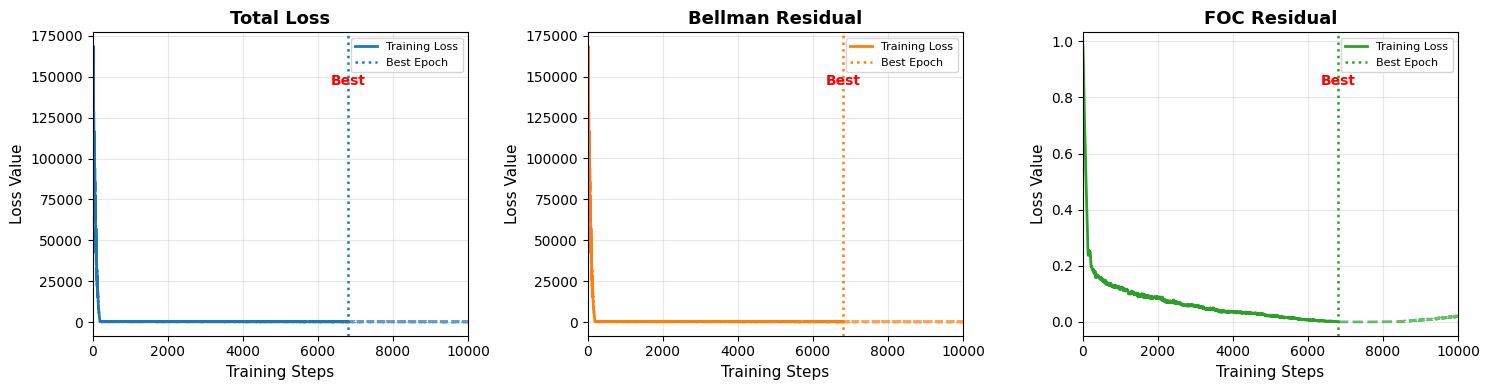

In [5]:
plot_training_curves(Trainer.__dict__)

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_evaluation_curves(logs, max_train_steps=None):

    required_keys = ['eval_epochs', 'eval_lifetime_reward']
    for k in required_keys:
        if k not in logs:
            raise ValueError(f"Missing key in logs: '{k}'")

    eval_epochs = np.asarray(logs['eval_epochs'])
    lifetime_reward = np.asarray(logs['eval_lifetime_reward'])

    best_epoch = logs.get('best_epoch')
    overfit_epoch = logs.get('overfit_epoch')

    fig, ax = plt.subplots(figsize=(6, 4))
    color = 'tab:blue'

    
    ax.plot(eval_epochs, lifetime_reward, '-', color=color, lw=0.8, label='Lifetime Reward')

 
    if best_epoch is not None and best_epoch in eval_epochs:
        idx_best = np.where(eval_epochs == best_epoch)[0][0]
        ax.axvline(best_epoch, color='red', linestyle='--', lw=1.5, label='Best Epoch')
        ax.text(best_epoch, lifetime_reward[idx_best],
                'Best', color='red', fontsize=9, ha='center', va='bottom', fontweight='bold')

    ax.set_xlabel('Training Steps', fontsize=12)
    ax.set_ylabel('Lifetime Reward', fontsize=12)
    ax.set_title('Evaluation Curve', fontsize=13, fontweight='bold')

    if max_train_steps is not None:
        ax.set_xlim(0, max_train_steps)

    ymin, ymax = np.min(lifetime_reward), np.max(lifetime_reward)
   
    ax.set_ylim(-10, ymax)

    ax.grid(alpha=0.3)
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

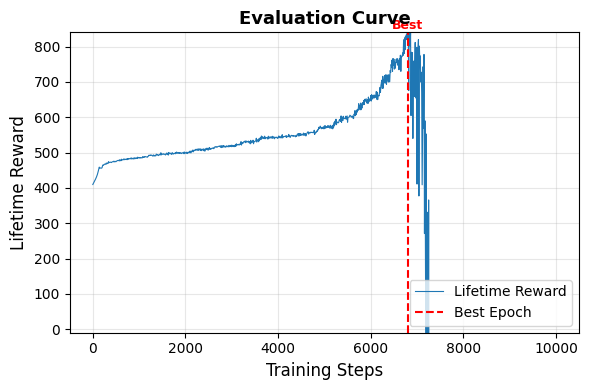

In [32]:
plot_evaluation_curves(Trainer.__dict__) 